In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [4]:
vgg=keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable=False

80150528/80134624 [==============================] - 13s 0us/step


In [6]:
for i in vgg.layers:
    print(i)

In [69]:
#创建一个噪点图
input_image=tf.Variable(
    tf.ones([1,256,256,3])*0.5 + tf.random.truncated_normal([1,256,256,3],mean=0.0,stddev=0.08)
    ,trainable=True
)

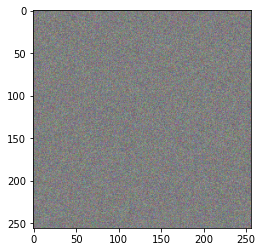

In [14]:
plt.imshow(input_image.numpy()[0,...])
plt.show()

In [70]:
#看一下卷积核
output=vgg.get_layer('block5_conv4').output
output.shape#没有给图片大小，所以只有第四维

TensorShape([None, None, None, 512])

In [71]:
vgg.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [72]:
#随便选一层看看卷积核效果
model=keras.Model(vgg.input,output[...,84:85])

In [83]:
output

<KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv4')>

(1, 16, 16, 1)


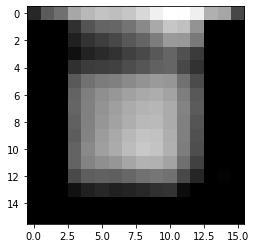

In [73]:
pic=model(input_image)
print(pic.shape)
plt.imshow(pic.numpy()[0,...,0],cmap='gray')
plt.show()
#猜测这个卷积核是检测如下形状的

In [74]:
#优化器
optimizer = keras.optimizers.RMSprop()#最小化的方法

In [75]:
@tf.function()
def train_step():
    with tf.GradientTape() as tape:
        mod_out=model(input_image)
        loss = -tf.reduce_mean(mod_out)#为了最大化mean
    grad = tape.gradient(loss,input_image)
    optimizer.apply_gradients([(grad,input_image)])
    return grad

In [76]:
for i in range(100):
    grad=train_step()

In [77]:
tf.clip_by_value(input_image,0.,1.)

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[0.5173169 , 0.38770902, 0.5239918 ],
         [0.54343   , 0.3831045 , 0.4145932 ],
         [0.6311948 , 0.36420858, 0.2844653 ],
         ...,
         [0.4570985 , 0.42530227, 0.48282886],
         [0.35438335, 0.3795728 , 0.5082517 ],
         [0.44209304, 0.46611562, 0.4056799 ]],

        [[0.5192369 , 0.33083108, 0.4295827 ],
         [0.61921835, 0.41008592, 0.6417317 ],
         [0.5964178 , 0.54482645, 0.3978652 ],
         ...,
         [0.37879777, 0.39505073, 0.5455636 ],
         [0.35958508, 0.3656197 , 0.3968611 ],
         [0.4678254 , 0.47789627, 0.45990387]],

        [[0.57526886, 0.35170916, 0.5486838 ],
         [0.5780756 , 0.6540894 , 0.65052325],
         [0.60480314, 0.40914425, 0.36937243],
         ...,
         [0.4004249 , 0.43861437, 0.4457233 ],
         [0.40923265, 0.2440401 , 0.43581757],
         [0.24676408, 0.3991591 , 0.34873083]],

        ...,

        [[0.5327937 , 0.27713493, 

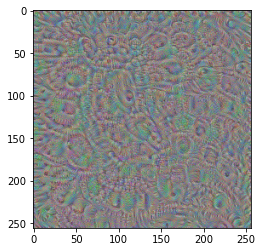

In [78]:
plt.imshow(input_image.numpy()[0,...])
#浅层卷积核偏向纹理，深层偏向具体图像